In [1]:
import sys 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [2]:
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
print("Number of categories in each...")
for c in categorical_columns:
    print(f'{c} : {df[c].nunique()}')

#checking number of unique entries in each categories 

Number of categories in each...
Brand : 11
Model : 58
Fuel_Type : 2
Transmission : 2
Owner_Type : 3


In [3]:
c2q_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']
for c in c2q_columns:
    print(f'{df[c].value_counts()}\n')

#checking frequency of unique entries 

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64



In [4]:
label_encoder = LabelEncoder()
for c in c2q_columns:
    df[c] = label_encoder.fit_transform(df[c])

#converting categorical values to numeric in order to facilitate regression fit 
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,1,1,0,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,1,0,1,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,1,0,0,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,0,1,2,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,0,0,1,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,0,0,0,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,0,1,1,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,1,1,2,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,1,0,1,17,1497,113,5,850000


Year                -0.232687
Kilometers_Driven   -0.051104
Fuel_Type           -0.180964
Transmission        -0.676484
Owner_Type          -0.301488
Mileage             -0.595252
Engine               0.714465
Power                0.856620
Seats               -0.000027
Price                1.000000
Name: Price, dtype: float64

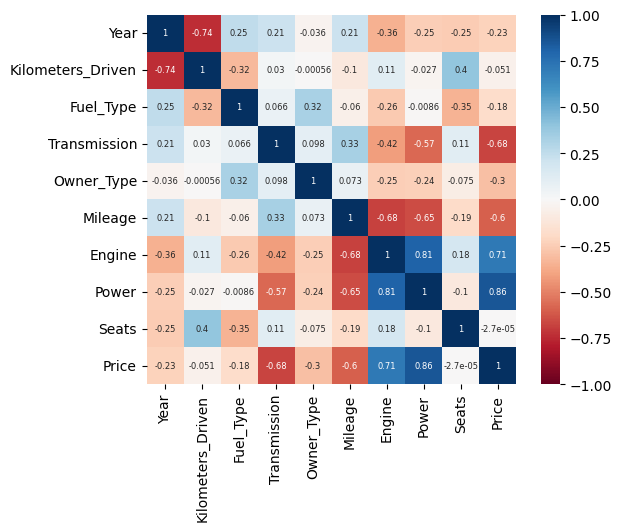

In [5]:
df1 = df.drop(['Car_ID', 'Brand', 'Model'], axis=1)
corr = df1.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, square=True, annot=True, annot_kws={"fontsize":6})
df1.corr()['Price']

#creating a correlation heatmap to make it easier to assess the relationship between variables 

In [6]:
df1 = df1.drop(['Year', 'Kilometers_Driven', 'Seats'], axis=1)
df1

#dropping columns with little correlation to the price 

,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,1,1,0,15,1498,108,800000
1,1,0,1,17,1597,140,1000000
2,1,0,0,10,4951,395,2500000
3,0,1,2,23,1248,74,600000
4,0,0,1,18,1999,194,850000
...,...,...,...,...,...,...,...
95,0,0,0,16,1950,191,2900000
96,0,1,1,13,2755,171,1400000
97,1,1,2,18,1497,121,750000
98,1,0,1,17,1497,113,850000


In [7]:
X = df1.drop(['Price'], axis = 1)
y = df['Price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)
lr = LinearRegression()

lr.fit(X_train,y_train)

#spltting the data into a training the testing set

LinearRegression()

In [9]:
c = lr.intercept_
m = lr.coef_
c, m

#the linear regression fit will be in the form y = a + bx1 + cx2 + ... + ε, 

(1858142.911341109,
 array([-3.70073815e+05, -5.21216232e+05, -1.07657257e+05, -4.56301345e+04,
        -1.97689789e+02,  8.54856256e+03]))

In [10]:
y_pred_train = lr.predict(X_train)


Text(0, 0.5, 'Predicted Charges')

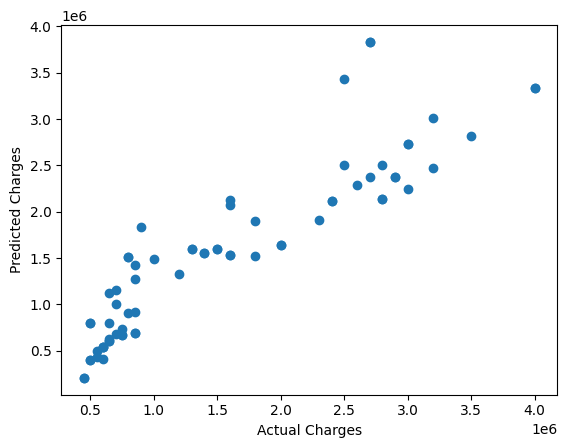

In [11]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')


In [12]:
r2_score(y_train, y_pred_train)

#assess the accuracy of the model on the training set 

0.8189111492169426

In [13]:
y_pred_test = lr.predict(X_test)

Text(0, 0.5, 'Predicted Charges')

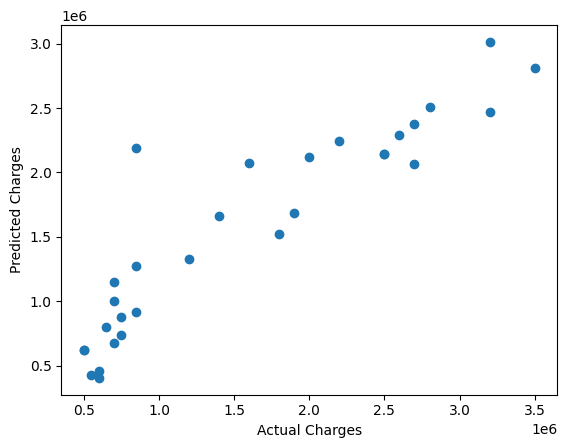

In [14]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [15]:
r2_score(y_test, y_pred_test)

#assess the accuracy on the testing set

0.8271122433912399

Model score is good, and can be improved further